In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
# from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_csv('Final.csv')
df.shape

(9650, 21)

In [36]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,3897,24,MAR,2019,22,20,1,10,2,50.0,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,7662,1,MAY,2019,5,50,13,15,7,25.0,445.0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1,No Info,6218,12,MAY,2019,18,5,23,30,5,25.0,325.0
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1,No Info,13302,1,MAR,2019,16,50,21,35,4,45.0,285.0
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2:25,0,No Info,3873,24,JUN,2019,9,0,11,25,2,25.0,145.0


In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_Hr', 'Duration_Min', 'Duration_bool'],
      dtype='object')

In [20]:
df1 = df[['Airline', 'Source', 'Destination', 'Total_Stops',
         'Additional_Info', 'Price', 'Day', 'Month', 'Duration_bool']]
df1.shape

(9650, 9)

In [21]:
df1.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Duration_bool
0,IndiGo,Banglore,New Delhi,0,No Info,3897,24,MAR,170.0
1,Air India,Kolkata,Banglore,2,No Info,7662,1,MAY,445.0
2,IndiGo,Kolkata,Banglore,1,No Info,6218,12,MAY,325.0
3,IndiGo,Banglore,New Delhi,1,No Info,13302,1,MAR,285.0
4,SpiceJet,Kolkata,Banglore,0,No Info,3873,24,JUN,145.0


In [22]:
df1 = df1.rename(columns={'Duration_bool': 'Duration'})

In [23]:
df1.isnull().any().any()

False

In [24]:
df1['Month'] = df1['Month'].map({
    'JAN':1,
    'FEB':2,
    'MAR':3,
    'APR':4,
    'MAY':5,
    'JUN':6,
    'JUL':7,
    'AUG':8,
    'SEP':9,
    'OCT':10,
    'NOV':11,
    'DEC':12
})

In [37]:
df1['Additional_Info'] = df1['Additional_Info'].map({
    'No Info':0, 
    'In-flight meal not included':1,
    'No check-in baggage included':2,
    '1 Short layover':3,
    '1 Long layover':4,
    'Change airports':5,
    'Business class':6,
    'Red-eye flight':7,
    '2 Long layover':8
})

In [38]:
dummies = pd.get_dummies(df1[['Airline', 'Source', 'Destination']])

In [40]:
df2 = pd.concat([df1,dummies], axis=1)
df2.shape

(9650, 32)

In [41]:
df2 = df2.drop(['Airline', 'Source', 'Destination'], axis=1)
df2.shape

(9650, 29)

In [29]:
df2.head()

,Total_Stops,Additional_Info,Price,Day,Month,Duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,3897,24,3,170.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,0,7662,1,5,445.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,6218,12,5,325.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,0,13302,1,3,285.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,3873,24,6,145.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [30]:
df2.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month', 'Duration',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [31]:
df2['Additional_Info'].unique()

array([0, 1, 3, 4, 5, 6, 7, 8], dtype=int64)

# Separating Target and Features

In [32]:
X = df2.drop('Price', axis=1)
y = df2['Price']

In [42]:
X

,Total_Stops,Additional_Info,Day,Month,Duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,24,3,170.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,0,1,5,445.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,12,5,325.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,0,1,3,285.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,24,6,145.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,0,1,21,5,160.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9646,0,0,9,4,150.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
9647,0,0,27,4,155.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
9648,0,0,1,3,160.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [44]:
y

0        3897
1        7662
2        6218
3       13302
4        3873
        ...  
9645     3257
9646     4107
9647     4145
9648    12648
9649    11753
Name: Price, Length: 9650, dtype: int64

Splitting Data for training and testing

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'train_test_split' is not defined

In [45]:
models = [['LinearRegression : ', LinearRegression()],
          ['ElasticNet :', ElasticNet()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['ExtraTreeRegressor : ', ExtraTreeRegressor()],
          ['HuberRegressor : ', HuberRegressor()],
          ['XGBRegressor : ', XGBRegressor()],
          ['BayesianRidge : ', BayesianRidge()]]

In [46]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    raw_predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, raw_predictions))))

LinearRegression :  2779.0455708889176
ElasticNet : 3379.6819876610443
Lasso :  2759.449381312224
Ridge :  2710.8476127741537
KNeighborsRegressor :  3240.4589432221046
DecisionTreeRegressor :  2047.9501651563828
RandomForestRegressor :  1671.5639501255544
SVR :  4246.460099935076
AdaBoostRegressor :  3257.070825150881
GradientBoostingRegressor :  1904.7364927923986
ExtraTreeRegressor :  2247.8973965597975
HuberRegressor :  3062.871572044321
XGBRegressor :  1603.7426372507193
BayesianRidge :  2773.2755615166534


# Hyper Parameter Tuning

In [47]:
algorithms = {
    'XGBRegressor' : {
        'model' : XGBRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [48]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [29]:
score

[{'model': 'XGBRegressor',
  'score': 0.8525809103369184,
  'params': {'min_child_weight': 3,
   'max_depth': 11,
   'learning_rate': 0.2,
   'gamma': 0.2,
   'colsample_bytree': 0.3}},
 {'model': 'RandomForestRegressor',
  'score': 0.8540314094480767,
  'params': {'n_estimators': 300,
   'min_samples_split': 2,
   'max_features': 'log2',
   'max_depth': 13}},
 {'model': 'GradientBoostingRegressor',
  'score': 0.865227544973614,
  'params': {'n_estimators': 500,
   'learning_rate': 0.5,
   'criterion': 'friedman_mse'}}]

In [24]:
final = pd.DataFrame(score, columns=['model', 'score', 'params'])
final

,model,score,params
0,XGBRegressor,0.852581,"{'min_child_weight': 3, 'max_depth': 11, 'lear..."
1,RandomForestRegressor,0.854031,"{'n_estimators': 300, 'min_samples_split': 2, ..."
2,GradientBoostingRegressor,0.865228,"{'n_estimators': 500, 'learning_rate': 0.5, 'c..."


In [75]:
final['params'][2] #Best Parameters for Gradient 

{'n_estimators': 500, 'learning_rate': 0.5, 'criterion': 'friedman_mse'}

# Evaluation of different models

In [53]:
from sklearn import metrics
from sklearn.metrics import r2_score
# Gradient Evaluation
regressor = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.3, criterion = 'friedman_mse')
regressor.fit(X_train, y_train)
g_predict = regressor.predict(X_test)
evaluate(y_test,prediction)


MAE: 959.4587458773832
MSE: 2703427.4109348957
RMSE: 1644.2102696841714
R2 Score: 0.8698318667512651


In [41]:
# Random Forest Evaluation
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)
random_predict = random_regressor.predict(X_test)
evaluate(y_test,random_predict)

MAE: 848.3755421394476
MSE: 2704472.3576786267
RMSE: 1644.5280045285415
R2 Score: 0.8697815532986362


In [43]:
# XG Boost Evaluation
xg_regressor = XGBRegressor(min_child_weight= 3,
   max_depth= 11,
   learning_rate= 0.2,
   gamma= 0.2,
   colsample_bytree= 0.3)
xg_regressor.fit(X_train,y_train)
xg_predict = xg_regressor.predict(X_test)
evaluate(y_test,xg_predict)

MAE: 939.3852925302245
MSE: 2811341.196941007
RMSE: 1676.7054592089235
R2 Score: 0.8646358936619188


In [30]:
# Evaulating Metrics
def evaluate(a,b):
    print('MAE:', metrics.mean_absolute_error(a, b))
    print('MSE:', metrics.mean_squared_error(a, b))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(a, b)))
    print("R2 Score:",r2_score(a,b))

In [46]:
from regressormetricgraphplot import *

In [47]:
plot = CompareModels()

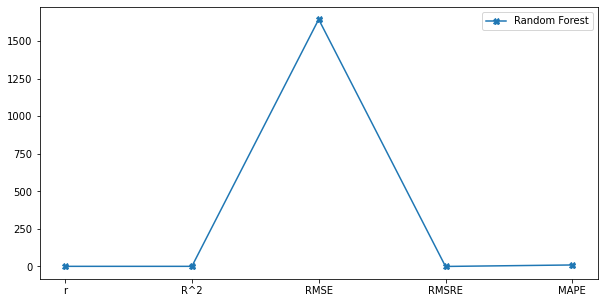

In [48]:
plot.add('Random Forest', y_test, random_predict)
plot.show(figsize=(10, 5))

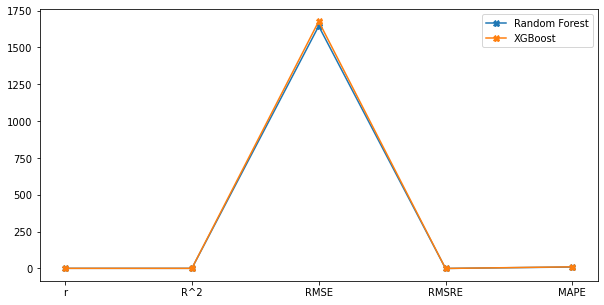

In [49]:
plot.add('XGBoost', y_test, xg_predict)
plot.show(figsize=(10, 15))

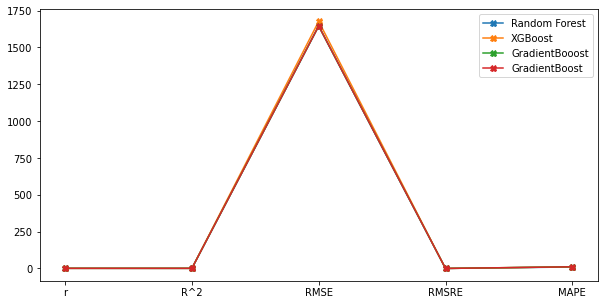

In [74]:
plot.add('GradientBoost', y_test, g_predict)
plot.show(figsize=(10, 5))

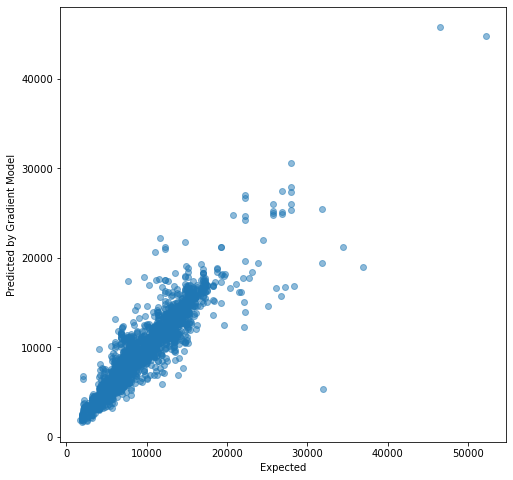

In [66]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,g_predict, alpha = 0.5)
plt.xlabel("Expected")
plt.ylabel("Predicted by Gradient Model")
plt.show()

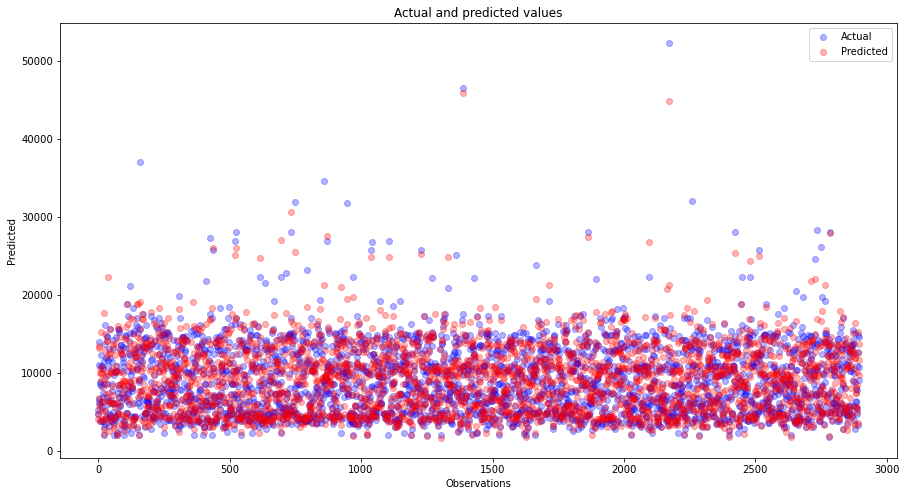

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))

plt.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
plt.scatter(x = range(0, g_predict.size), y=g_predict, c = 'red', label = 'Predicted', alpha = 0.3)
plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Predicted')
plt.legend()
plt.show()

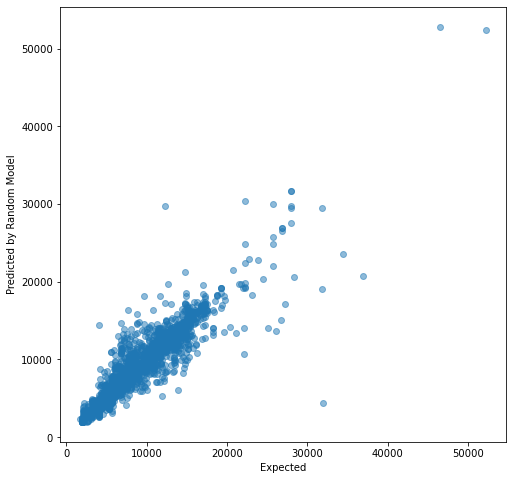

In [56]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,random_predict, alpha = 0.5)
plt.xlabel("Expected")
plt.ylabel("Predicted by Random Model")
plt.show()

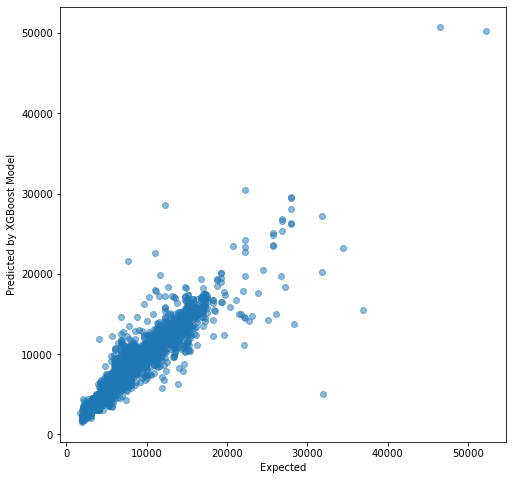

In [64]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,xg_predict, alpha = 0.5)
plt.xlabel("Expected")
plt.ylabel("Predicted by XGBoost Model")

plt.show()

Save Model to reuse it

In [24]:
import pickle
file = open('final_model.pkl', 'wb')
pickle.dump(regressor, file)

In [25]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))